# Accidentes viales en Monterrey, Nuevo Leon, Mexico

### El objetivo de este analisis es obtener la prediccion que tipo de accidente puede haber en Monterrey
#### Los datos obtenidos vienen de la pagina: https://nuevoleon.opendatasoft.com/pages/mty/
---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ModuleNotFoundError: No module named 'matplotlib'

In [ ]:
accidentes = pd.read_csv('accidentes-mty.csv')
##accidentes2 = pd.read_csv('accidentesmty.csv',   encoding='utf-8',  low_memory=False)
##accidentes3 = pd.read_csv('accidentesmty2.csv',   encoding='utf-8',  low_memory=False)

In [ ]:
accidentes

,fecha,hora,nombre_de_la_vialidad,cruce,sentido,clave_de_la_localidad,nombre_de_la_localiad,clave_del_municipio,nombre_del_municipio_o_delegacino,clave_de_la_entidad_federativa,...,tipo_de_via,estatus_de_licencia,edad,genero,uso_de_cinturon,por_alcohol,dictamen,arresto,lesionados,muertos
0,01/05/16,5:00,camino real,santos palomo,sur a norte,1,monterrey,39,monterrey,19,...,via secundaria,sin licencia,sd,m,no,na,na,na,0,0
1,01/05/16,6:20,alfonso reyes,las musas,poniente a oriente,1,monterrey,39,monterrey,19,...,via primaria,sin licencia,sd,m,no,na,na,na,0,0
2,01/05/16,8:42,madero,emilio carranza,sur a norte,1,monterrey,39,monterrey,19,...,via secundaria,vigente,sd,m,no,na,na,na,0,0
3,01/05/16,6:30,gonzalitos,mendirichaga,sur a norte,1,monterrey,39,monterrey,19,...,via primaria,vigente,33,m,no,na,na,na,0,0
4,01/05/16,8:01,dr coss,padre mier,sur a norte,1,monterrey,39,monterrey,19,...,via primaria,vigente,20,f,no,na,na,na,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125811,31/07/20,21:27,argos,garza sada,poniente a oriente,1,monterrey,39,monterrey,19,...,via secundaria,na,sd,NaN,na,na,na,no,0,0
125812,31/07/20,23:22,pablo gonzalez g.,gonzalitos,poniente a oriente,1,monterrey,39,monterrey,19,...,via primaria,na,sd,NaN,na,na,na,no,0,0
125813,31/07/20,1:55,constitucion,revolucion,oriente a poniente,1,monterrey,39,monterrey,19,...,via primaria,vigente,sd,m,na,na,na,no,0,0
125814,31/07/20,22:10,felix u gomez,espinosa,sur a norte,1,monterrey,39,monterrey,19,...,via primaria,na,41,m,na,na,na,na,1,0


## Informacion General de los datos

In [ ]:
accidentes.tail()

,Folio,Ejercicio,Mes,Fecha,Dia,Hora,Tipo_de_accidente,Resolución,Origen_de_reporte,Tipo_de_asentamiento,Nombre_de_asentamiento,Tipo_de_vialidad,Nombre_de_la_Vialidad,Georreferencia,Nota
50369,113064,2023,Marzo,2023-03-31,2023-03-31 00:00:00,18:16:00,crucero,finiquitado,c4,colonia,terminal,calle,felix u gomez,"25.67517, -100.291803",NaN
50370,114345,2023,Marzo,2023-03-31,2023-03-31 00:00:00,17:08:00,lateral,finiquitado,c4,colonia,obrera,calle,constitucion,"25.672936, -100.286867",NaN
50371,114236,2023,Marzo,2023-03-31,2023-03-31 00:00:00,13:29:00,alcance,finiquitado,c4,colonia,del norte,calle,ruiz cortines,"25.704167, -100.308704",NaN
50372,114197,2023,Marzo,2023-03-31,2023-03-31 00:00:00,14:37:00,lateral,peritajes,c4,colonia,contry,calle,revolucion,"25.630636, -100.272544",NaN
50373,114319,2023,Marzo,2023-03-31,2023-03-31 00:00:00,16:54:00,lateral,finiquitado,c4,colonia,pio x,calle,morones prieto,"25.664347, -100.32805",NaN


In [ ]:
accidentes.dtypes

 Folio                      int64
 Ejercicio                  int64
 Mes                       object
 Fecha                     object
 Dia                       object
 Hora                      object
 Tipo_de_accidente         object
 Resolución                object
 Origen_de_reporte         object
 Tipo_de_asentamiento      object
 Nombre_de_asentamiento    object
 Tipo_de_vialidad          object
 Nombre_de_la_Vialidad     object
 Georreferencia            object
 Nota                      object
dtype: object

In [ ]:
accidentes.columns

Index([' Folio', ' Ejercicio', ' Mes', ' Fecha', ' Dia', ' Hora',
       ' Tipo_de_accidente', ' Resolución', ' Origen_de_reporte',
       ' Tipo_de_asentamiento', ' Nombre_de_asentamiento', ' Tipo_de_vialidad',
       ' Nombre_de_la_Vialidad', ' Georreferencia', ' Nota'],
      dtype='object')

In [ ]:
accidentes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50374 entries, 0 to 50373
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0    Folio                   50374 non-null  int64 
 1    Ejercicio               50374 non-null  int64 
 2    Mes                     50374 non-null  object
 3    Fecha                   50374 non-null  object
 4    Dia                     50374 non-null  object
 5    Hora                    50337 non-null  object
 6    Tipo_de_accidente       50374 non-null  object
 7    Resolución              50372 non-null  object
 8    Origen_de_reporte       50374 non-null  object
 9    Tipo_de_asentamiento    50374 non-null  object
 10   Nombre_de_asentamiento  50373 non-null  object
 11   Tipo_de_vialidad        50374 non-null  object
 12   Nombre_de_la_Vialidad   50374 non-null  object
 13   Georreferencia          48839 non-null  object
 14   Nota                    6334 non-null

In [ ]:
accidentes.shape

(50374, 15)

## Limpieza de datos

In [ ]:
# remover los espacios vacios en las columns
accidentes.columns = accidentes.columns.str.replace(" ", "")
accidentes.columns

Index(['Folio', 'Ejercicio', 'Mes', 'Fecha', 'Dia', 'Hora',
       'Tipo_de_accidente', 'Resolución', 'Origen_de_reporte',
       'Tipo_de_asentamiento', 'Nombre_de_asentamiento', 'Tipo_de_vialidad',
       'Nombre_de_la_Vialidad', 'Georreferencia', 'Nota'],
      dtype='object')

In [ ]:
# remover columnas no importantes
accidentes = accidentes.drop('Nota', axis=1)
accidentes = accidentes.drop('Resolución', axis=1)
accidentes = accidentes.drop('Tipo_de_vialidad', axis=1)
accidentes = accidentes.drop('Ejercicio', axis=1)
accidentes = accidentes.drop('Folio', axis=1)
accidentes = accidentes.drop('Origen_de_reporte', axis=1)
accidentes = accidentes.drop('Tipo_de_asentamiento', axis=1)
accidentes = accidentes.drop('Dia', axis=1)
accidentes = accidentes.drop('Georreferencia', axis=1)
accidentes = accidentes.drop('Mes', axis=1)

In [ ]:
accidentes.isnull().sum()

Fecha                      0
Hora                      37
Tipo_de_accidente          0
Nombre_de_asentamiento     1
Nombre_de_la_Vialidad      0
dtype: int64

In [ ]:
# renombrar columna de asentamiento a colonia
accidentes.rename(columns={'Nombre_de_asentamiento': 'Colonia'}, inplace=True)
# renombrar columna de tipo de accidente 
accidentes.rename(columns={'Tipo_de_accidente': 'Tipo'}, inplace=True)
# renombrar columna de tipo de vialidad 
accidentes.rename(columns={'Nombre_de_la_Vialidad': 'Vialidad'}, inplace=True)

In [ ]:
# Eliminar los 38 registros nulos, ya que son pocos se pueden eliminar
accidentes = accidentes.dropna()

In [ ]:
accidentes.isnull().sum()

Fecha       0
Hora        0
Tipo        0
Colonia     0
Vialidad    0
dtype: int64

In [ ]:
# Solo obtener las horas de la columna Hora
accidentes['Hora'] = accidentes['Hora'].str.extract(r'(\d{2})')
# Convertir fecha a datetime 
accidentes['Fecha'] = pd.to_datetime(accidentes['Fecha'])

In [ ]:
# Eliminar horas nulas 
accidentes = accidentes.dropna()

In [ ]:
# Insertar Dia, Mes y Año en una nueva columna y luego borrar la columna Fecha
# Extract year, month, and day into separate integer columns
accidentes['Año'] = accidentes['Fecha'].dt.year
accidentes['Mes'] = accidentes['Fecha'].dt.month
accidentes['Dia'] = accidentes['Fecha'].dt.day

In [ ]:
accidentes.tail()

,Fecha,Hora,Tipo,Colonia,Vialidad,Año,Mes,Dia
50369,2023-03-31,18,crucero,terminal,felix u gomez,2023,3,31
50370,2023-03-31,17,lateral,obrera,constitucion,2023,3,31
50371,2023-03-31,13,alcance,del norte,ruiz cortines,2023,3,31
50372,2023-03-31,14,lateral,contry,revolucion,2023,3,31
50373,2023-03-31,16,lateral,pio x,morones prieto,2023,3,31


In [ ]:
# Remover Fecha
accidentes = accidentes.drop('Fecha', axis=1)

In [ ]:
len(accidentes['Vialidad'].unique())

2342

In [ ]:
accidentes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50140 entries, 0 to 50373
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Hora      50140 non-null  object
 1   Tipo      50140 non-null  object
 2   Colonia   50140 non-null  object
 3   Vialidad  50140 non-null  object
 4   Año       50140 non-null  int64 
 5   Mes       50140 non-null  int64 
 6   Dia       50140 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 3.1+ MB


In [ ]:
# Revisamos nuestras columnas tipo objeto
accidentes.columns[accidentes.dtypes == object]


Index(['Hora', 'Tipo', 'Colonia', 'Vialidad'], dtype='object')

In [ ]:
# Convertir Hora a enter
accidentes['Hora'] = accidentes['Hora'].astype('int')

In [ ]:
accidentes['Colonia'].unique()

array(['bellavista', 'pablo a de la garza', 'san jeronimo', 'centro',
       'bosques de valle alto', 'urdiales', 'lomas de san francisco',
       'central', 'victoria', 'obrera', 'las cumbres',
       'balcones del mirador', 'valle verde 2o sector', 'vidriera',
       'talleres', 'hogares ferrocarrileros', 'buenos aires', 'mederos',
       'garza nieto', 'valle verde 1o sector', 'mitras norte',
       'nueva morelos', 'estrella', 'niño artillero', 'martinez',
       'industrial', 'los doctores', 'coyoacan', 'el maguey',
       'barrio del parque', 'obrerista', 'contry', 'mitras centro',
       'el porvenir', 'residencial lincoln', 'alta vista', 'del norte',
       'roma', 'independencia', 'moderna', 'vista hermosa',
       'burocratas municipales', 'alfareros', 'valle de santa lucia',
       'barrio san luis', 'fomerrey 119', 'plutarco elias calles',
       'rincon de la primavera', 'santa maria', 'puerta de hierro',
       'zapata', 'san jorge', '15 de septiembre', 'industrial lincol

In [ ]:
# Convertir las columnas de Colonia y Vialidad a categoricas
from pandas.api.types import CategoricalDtype

tipo_colonia = CategoricalDtype(categories=accidentes['Colonia'].unique(), ordered=False)
tipo_vialidad = CategoricalDtype(categories=accidentes['Vialidad'].unique(), ordered=False)

accidentes["Colonia"] = accidentes["Colonia"].astype(tipo_colonia)
accidentes["Vialidad"] = accidentes["Vialidad"].astype(tipo_vialidad)

In [ ]:
# Creamos columnas nuevas con los valores numéricos de las categorías
accidentes['ColoniaCode'] = accidentes["Colonia"].cat.codes
accidentes['VialidadCode'] = accidentes["Vialidad"].cat.codes

In [ ]:
accidentes

,Hora,Tipo,Colonia,Vialidad,Año,Mes,Dia,ColoniaCode,VialidadCode
0,13,otro,bellavista,amado nervo,2021,7,1,0,0
1,10,otro,pablo a de la garza,colon,2021,7,1,1,1
2,5,atropello,san jeronimo,av san jeronimo,2021,7,1,2,2
3,13,alcance,centro,constitucion,2021,7,1,3,3
4,13,lateral,bosques de valle alto,carretera nacional,2021,7,1,4,4
...,...,...,...,...,...,...,...,...,...
50369,18,crucero,terminal,felix u gomez,2023,3,31,63,36
50370,17,lateral,obrera,constitucion,2023,3,31,9,3
50371,13,alcance,del norte,ruiz cortines,2023,3,31,36,11
50372,14,lateral,contry,revolucion,2023,3,31,31,34


In [ ]:
accidentes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50140 entries, 0 to 50373
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Hora          50140 non-null  int64   
 1   Tipo          50140 non-null  object  
 2   Colonia       50140 non-null  category
 3   Vialidad      50140 non-null  category
 4   Año           50140 non-null  int64   
 5   Mes           50140 non-null  int64   
 6   Dia           50140 non-null  int64   
 7   ColoniaCode   50140 non-null  int16   
 8   VialidadCode  50140 non-null  int16   
dtypes: category(2), int16(2), int64(4), object(1)
memory usage: 2.8+ MB


In [ ]:
accidentes["Tipo"].unique()

array(['otro', 'atropello', 'alcance', 'lateral', 'estrellamiento',
       'volcadura', 'caida de persona', 'de frente', 'de reversa',
       'incendio', 'Lateral', 'Alcance', 'Otro', 'Volcadura',
       'Estrellamiento', 'De Reversa', 'De Frente', 'Atropello',
       'Caída de Persona', 'Incendio', 'Salida del Camino', 'crucero',
       'no guardo distancia', 'no respeto semaforo', 'invasion de carril',
       'Crucero', 'salida de camino', 'no respeto señalamientos',
       'estado de alcoholismo', 'exceso de velocidad', 'distraccion',
       'sentido contrario', 'exceso de dimensiones', 'EStrellamiento',
       'giro indebido'], dtype=object)

In [ ]:
accidentes['Tipo'] = accidentes['Tipo'].apply(lambda x: x.lower())

In [ ]:
accidentes["Tipo"].unique()

array(['otro', 'atropello', 'alcance', 'lateral', 'estrellamiento',
       'volcadura', 'caida de persona', 'de frente', 'de reversa',
       'incendio', 'caída de persona', 'salida del camino', 'crucero',
       'no guardo distancia', 'no respeto semaforo', 'invasion de carril',
       'salida de camino', 'no respeto señalamientos',
       'estado de alcoholismo', 'exceso de velocidad', 'distraccion',
       'sentido contrario', 'exceso de dimensiones', 'giro indebido'],
      dtype=object)

In [ ]:
# Remover Y que es lo mismo pero con acento
listaCaidas = accidentes[accidentes['Tipo'] == 'caída de persona'].index
for index in listaCaidas:
    accidentes.at[index, 'Tipo'] = 'caida de persona'

In [ ]:
accidentes["Tipo"].unique()

array(['otro', 'atropello', 'alcance', 'lateral', 'estrellamiento',
       'volcadura', 'caida de persona', 'de frente', 'de reversa',
       'incendio', 'salida del camino', 'crucero', 'no guardo distancia',
       'no respeto semaforo', 'invasion de carril', 'salida de camino',
       'no respeto señalamientos', 'estado de alcoholismo',
       'exceso de velocidad', 'distraccion', 'sentido contrario',
       'exceso de dimensiones', 'giro indebido'], dtype=object)

In [ ]:
#Frecuencia de los tipos"
crosstab = pd.crosstab(index=accidentes["Tipo"], columns="count")   
crosstab

col_0,count
Tipo,
alcance,14876
lateral,13488
otro,21758


In [ ]:
 # Remover unico registro de exceso de dimensiones
excesoIndex = accidentes[accidentes['Tipo'] == 'exceso de dimensiones'].index
accidentes = accidentes.drop(index=excesoIndex)
# remover giro indebido ya que contiene solo 2
giroIndex = accidentes[accidentes['Tipo'] == 'giro indebido'].index
accidentes = accidentes.drop(index=giroIndex)
# remover salida de camino
index2 = accidentes[accidentes['Tipo'] == 'salida de camino'].index
accidentes = accidentes.drop(index=index2)
# remover salida del camino 
index3 = accidentes[accidentes['Tipo'] == 'salida del camino'].index
accidentes = accidentes.drop(index=index3)
# remover sentido contrario 
index4 = accidentes[accidentes['Tipo'] == 'sentido contrario'].index
accidentes = accidentes.drop(index=index4)
# cambiar distraccion, no respeto semaforo, incendio, estado de alcoholismo,  exceso de velocidad como otros
lista = accidentes[accidentes['Tipo'] == 'distraccion'].index
for index in lista:
    accidentes.at[index, 'Tipo'] = 'otro'
lista = accidentes[accidentes['Tipo'] == 'no respeto semaforo'].index
for index in lista:
    accidentes.at[index, 'Tipo'] = 'otro'
lista = accidentes[accidentes['Tipo'] == 'incendio'].index
for index in lista:
    accidentes.at[index, 'Tipo'] = 'otro'
lista = accidentes[accidentes['Tipo'] == 'estado de alcoholismo'].index
for index in lista:
    accidentes.at[index, 'Tipo'] = 'otro'
lista = accidentes[accidentes['Tipo'] == 'exceso de velocidad'].index
for index in lista:
    accidentes.at[index, 'Tipo'] = 'otro'
# poner tambien como otros atropello, caida de persona, de frente, de reversa, invasion de carril, no guardo distancia, no respeta senalamientos, vocladura 
lista = accidentes[accidentes['Tipo'] == 'atropello'].index
for index in lista:
    accidentes.at[index, 'Tipo'] = 'otro'
    
lista = accidentes[accidentes['Tipo'] == 'caida de persona'].index
for index in lista:
    accidentes.at[index, 'Tipo'] = 'otro'
    
lista = accidentes[accidentes['Tipo'] == 'de frente'].index
for index in lista:
    accidentes.at[index, 'Tipo'] = 'otro'
    
lista = accidentes[accidentes['Tipo'] == 'de reversa'].index
for index in lista:
    accidentes.at[index, 'Tipo'] = 'otro'
    
lista = accidentes[accidentes['Tipo'] == 'invasion de carril'].index
for index in lista:
    accidentes.at[index, 'Tipo'] = 'otro'
    
lista = accidentes[accidentes['Tipo'] == 'no guardo distancia'].index
for index in lista:
    accidentes.at[index, 'Tipo'] = 'otro'
    
lista = accidentes[accidentes['Tipo'] == 'no respeto señalamientos'].index
for index in lista:
    accidentes.at[index, 'Tipo'] = 'otro'
    
lista = accidentes[accidentes['Tipo'] == 'volcadura'].index
for index in lista:
    accidentes.at[index, 'Tipo'] = 'otro'
    
lista = accidentes[accidentes['Tipo'] == 'crucero'].index
for index in lista:
    accidentes.at[index, 'Tipo'] = 'otro'
    
lista = accidentes[accidentes['Tipo'] == 'estrellamiento'].index
for index in lista:
    accidentes.at[index, 'Tipo'] = 'otro'


## Entrenamiento del modelo

In [ ]:
# Seleccion de X y Y 
df_X = accidentes.drop(columns=['Tipo','Colonia', 'Vialidad'])
df_y = accidentes['Tipo']
df_X

,Hora,Año,Mes,Dia,ColoniaCode,VialidadCode
0,13,2021,7,1,0,0
1,10,2021,7,1,1,1
2,5,2021,7,1,2,2
3,13,2021,7,1,3,3
4,13,2021,7,1,4,4
...,...,...,...,...,...,...
50369,18,2023,3,31,63,36
50370,17,2023,3,31,9,3
50371,13,2023,3,31,36,11
50372,14,2023,3,31,31,34


In [ ]:
df_y

0           otro
1           otro
2           otro
3        alcance
4        lateral
          ...   
50369       otro
50370    lateral
50371    alcance
50372    lateral
50373    lateral
Name: Tipo, Length: 50122, dtype: object

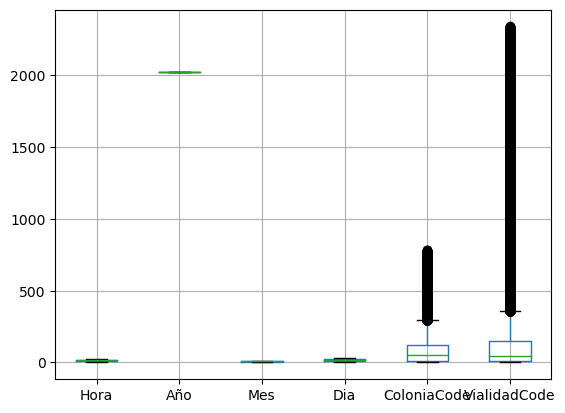

In [ ]:
df_X.boxplot()
plt.show()

## Estandarizar

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_X = scaler.fit_transform(df_X)

In [ ]:
df_X

array([[-0.10467705, -1.38835943,  0.06430503, -1.67139883, -0.82911243,
        -0.50190664],
       [-0.6915039 , -1.38835943,  0.06430503, -1.67139883, -0.81976592,
        -0.49918905],
       [-1.66954865, -1.38835943,  0.06430503, -1.67139883, -0.81041941,
        -0.49647145],
       ...,
       [-0.10467705,  1.72419375, -1.04271765,  1.73784422, -0.49263812,
        -0.47201309],
       [ 0.0909319 ,  1.72419375, -1.04271765,  1.73784422, -0.53937066,
        -0.40950839],
       [ 0.4821498 ,  1.72419375, -1.04271765,  1.73784422,  0.57286384,
        -0.48288347]])

In [ ]:
# Get the subset of DataFrame with columns you want to scale
columnas = ['Hora', 'Año', 'Mes', 'Dia', 'ColoniaCode', 'VialidadCode']
df_X =  pd.DataFrame(df_X, columns=columnas)

In [ ]:
df_X

,Hora,Año,Mes,Dia,ColoniaCode,VialidadCode
0,-0.104677,-1.388359,0.064305,-1.671399,-0.829112,-0.501907
1,-0.691504,-1.388359,0.064305,-1.671399,-0.819766,-0.499189
2,-1.669549,-1.388359,0.064305,-1.671399,-0.810419,-0.496471
3,-0.104677,-1.388359,0.064305,-1.671399,-0.801073,-0.493754
4,-0.104677,-1.388359,0.064305,-1.671399,-0.791726,-0.491036
...,...,...,...,...,...,...
50117,0.873368,1.724194,-1.042718,1.737844,-0.240282,-0.404073
50118,0.677759,1.724194,-1.042718,1.737844,-0.744994,-0.493754
50119,-0.104677,1.724194,-1.042718,1.737844,-0.492638,-0.472013
50120,0.090932,1.724194,-1.042718,1.737844,-0.539371,-0.409508


In [ ]:
df_X.describe()

,Hora,Año,Mes,Dia,ColoniaCode,VialidadCode
count,5.012200e+04,5.012200e+04,5.012200e+04,5.012200e+04,5.012200e+04,5.012200e+04
mean,1.373680e-16,1.059160e-13,4.536405e-17,-8.845989e-17,2.778548e-17,5.670506e-19
std,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00
min,-2.647593e+00,-1.388359e+00,-1.596229e+00,-1.671399e+00,-8.291124e-01,-5.019066e-01
25%,-6.915039e-01,-1.388359e+00,-1.042718e+00,-8.759088e-01,-7.356473e-01,-4.665779e-01
50%,9.093190e-02,1.679172e-01,6.430503e-02,3.322270e-02,-3.711335e-01,-3.823324e-01
75%,8.733677e-01,1.679172e-01,8.945720e-01,8.287127e-01,3.392011e-01,-9.154971e-02
max,1.851412e+00,1.724194e+00,1.448083e+00,1.737844e+00,6.479857e+00,5.859985e+00


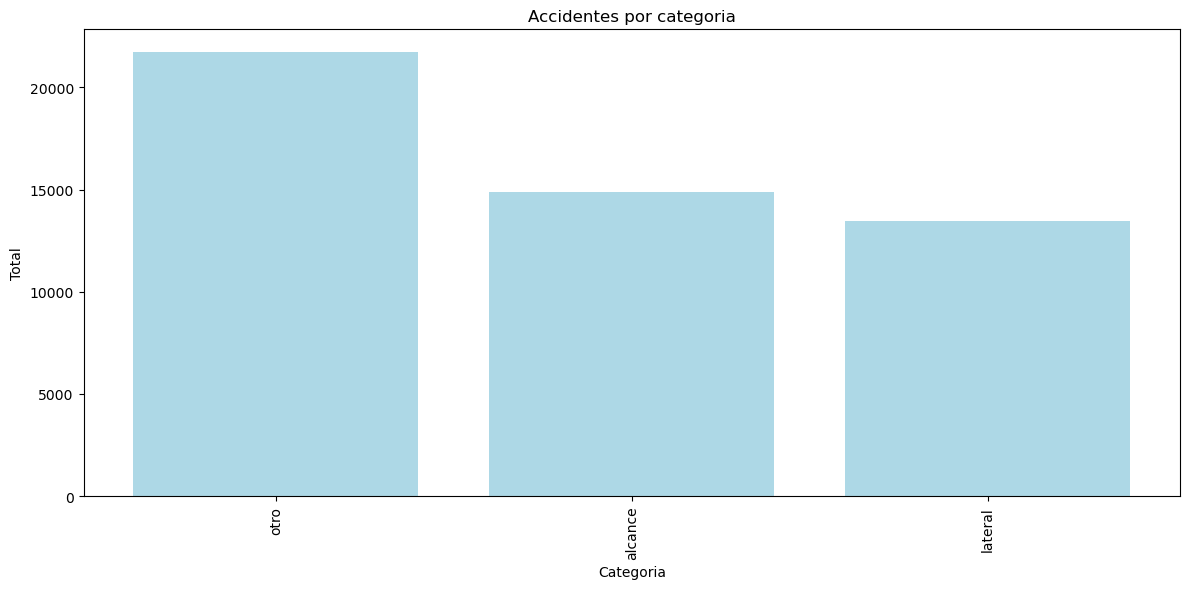

In [ ]:
valores = np.array([])
categorias = np.array([])

for indice in range(len(crosstab)):
    valores = np.append(valores, len(accidentes[accidentes['Tipo'] == accidentes['Tipo'].unique()[indice]]))
    categorias = np.append(categorias, accidentes['Tipo'].unique()[indice])
    
plt.figure(figsize=(12, 6))
plt.bar(categorias, valores, color='lightblue')
plt.xticks(rotation=90)
plt.xlabel('Categoria')
plt.ylabel('Total')
plt.title('Accidentes por categoria')
plt.tight_layout()

plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
df_X_train, df_X_test, df_y_train, df_y_test = train_test_split(df_X, df_y, test_size=0.15, random_state=19)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Instanciar modelo
#modelo = LogisticRegression(random_state=0, max_iter=1000)
modelo = DecisionTreeClassifier(criterion= 'entropy', max_depth= 23)
#modelo = SVC(kernel='poly', C=1) # linear, poly, sigmoid, rbf
#modelo = MLPClassifier(activation='relu', hidden_layer_sizes=[10,10])# relu, sigmoid, tanh, linear

In [ ]:
# Encontrar mejores parametros
#from sklearn.model_selection import GridSearchCV, StratifiedKFold


#param_grid = {
             # 'max_depth' : [5, 6, 7, 8, 9, 10, 20, 25, 30 ],
              #'criterion' :['gini', 'entropy']
             #}#
#cv_strategy = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

#grid_search = GridSearchCV(estimator=modelo, param_grid=param_grid, cv=cv_strategy, verbose= 4)
#grid_search.fit(df_X_train, df_y_train)

In [ ]:
#final_clf = grid_search.best_estimator_
#print(final_clf)

In [ ]:
#print(grid_search.best_params_)

In [ ]:
#final_clf.score(df_X_test, df_y_test)

In [ ]:
modelo.fit(df_X_train, df_y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=23)

## Evaluacion del modelo

In [ ]:
df_y_train_pred = modelo.predict(df_X_test)


In [ ]:
#y_pred

In [ ]:
#accuracy = accuracy_score(df_y_test, y_pred)
#print("Accuracy:", accuracy)

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
df_y_train_pred = modelo.predict(df_X_train)

In [ ]:
cm = confusion_matrix(df_y_train, df_y_train_pred)


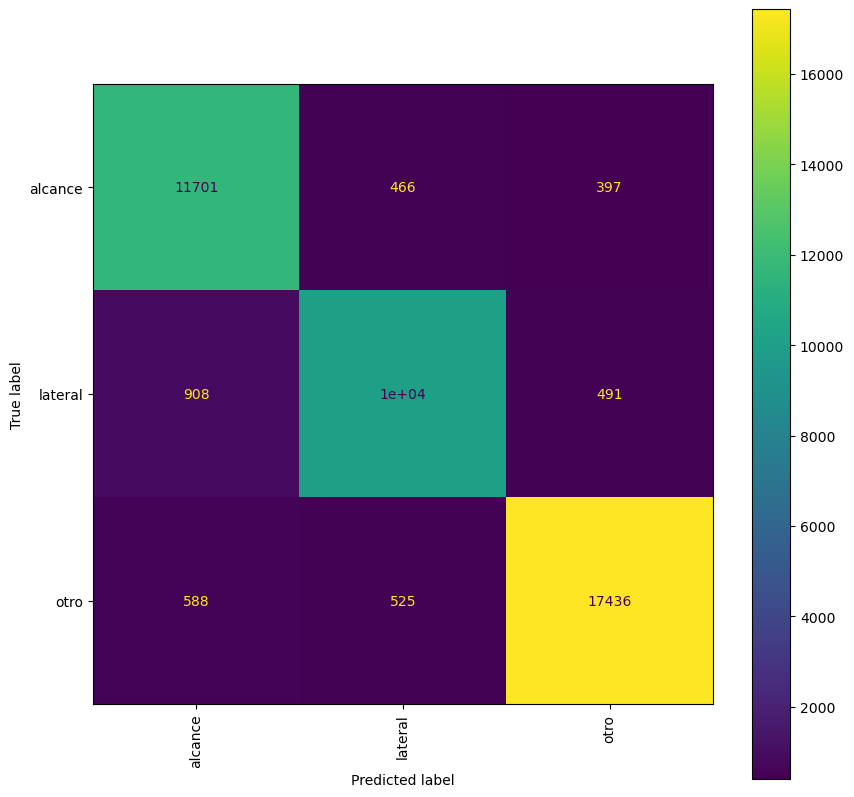

In [ ]:
cmp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelo.classes_)
fig, ax = plt.subplots(figsize=(10,10))
cmp.plot(ax=ax, xticks_rotation=90)

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
pr = precision_score(df_y_train, df_y_train_pred, average='weighted',  zero_division=1)
re = recall_score(df_y_train, df_y_train_pred, average='weighted',  zero_division=1)
acc = accuracy_score(df_y_train, df_y_train_pred)
f1 = f1_score(df_y_train, df_y_train_pred, average='weighted',  zero_division=1)

print("Train Precision: ", pr)
print("Train Recall: ", re)
print("Train F1: ", f1)
print("Train Accuracy: ", acc)


Train Precision:  0.9213521926730898
Train Recall:  0.9207802267445955
Train F1:  0.9208102109447294
Train Accuracy:  0.9207802267445955


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

In [ ]:
precision_scorer = make_scorer(precision_score,  average='weighted',  zero_division=1)

In [ ]:
results = cross_val_score(model, df_X, df_y, scoring=precision_scorer, cv=5)
results

array([0.6396605 , 0.64102873, 0.64144138, 0.64500613, 0.61177217])

## Guardar modelo

In [ ]:
from joblib import dump, load

In [ ]:
dump(model, 'modelo1.joblib')

['modelo1.joblib']